# sommelier.ai
#### Practical Machine Learning Workshop

### Agenda:
- Data Exploration with pandas
- Modeling with scikit-learn

### Tools and Documentation
- [pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [matplotlib](https://matplotlib.org/api/api_overview.html)
- [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)


## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from workshop import boxplot_sorted

sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('.\\data\\winemag-data.zip')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord


## Modeling

In [6]:
from sklearn import metrics
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.preprocessing import *

from workshop import show_most_informative_features

In [7]:
show_most_informative_features()

<function workshop.show_most_informative_features(model, vectorizer=None, classifier=None, n=20)>

In [14]:
?df.min


Signature: df.min(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
Docstring:
This method returns the minimum of the values in the object.
            If you want the *index* of the minimum, use ``idxmin``. This is
            the equivalent of the ``numpy.ndarray`` method ``argmin``.

Parameters
----------
axis : {index (0), columns (1)}
skipna : boolean, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series
numeric_only : boolean, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

Returns
-------
min : Series or DataFrame (if level specified)
File:      c:\programdata\miniconda3\envs\sommelier\lib\site-packages\pandas\core\generic.py
Type:      method


In [20]:
?df.sort_values

Signature: df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
Docstring:
Sort by the values along either axis

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels

    .. versionchanged:: 0.23.0
       Allow specifying index or column level names.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     if True, perform operation in-place
kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
     Choice of sorting algorithm. See also ndarray.np.sort for more
     inf

In [21]:
df.sort_values(by=['points'])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
72631,US,"This has fierce acidity, and is sweet in cherr...",Stolpman Vineyard,80,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Santa Barbara Winery 2008 Stolpman Vineyard Sa...,Sangiovese,Santa Barbara Winery
38510,US,"Vegetal and watery, a very dry wine that offer...",NaN,80,15.0,California,Santa Barbara County,Central Coast,NaN,NaN,Pacific Oasis 2005 Chardonnay (Santa Barbara C...,Chardonnay,Pacific Oasis
69878,US,"A blend of Petite Sirah and Petit Verdot, this...",Petite Petit,80,22.0,California,Lodi,Central Valley,NaN,NaN,Michael David 2005 Petite Petit Red (Lodi),Red Blend,Michael David
29286,Spain,Smells like fruit juice. Overall it's raisiny ...,Organic,80,16.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Ardales 2008 Organic Tempranillo (Vino de la T...,Tempranillo,Ardales
67231,New Zealand,"A tartly acidic wine, with some sweet molasses...",NaN,80,16.0,Canterbury,NaN,NaN,Joe Czerwinski,@JoeCz,Willow Creek 2000 Pinot Noir (Canterbury),Pinot Noir,Willow Creek
1437,Spain,Pinched austere aromas of cat pee and oily swe...,Más Que 2,80,19.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,La Val 2016 Más Que 2 White (Rías Baixas),White Blend,La Val
64078,Argentina,"Severely compromised by green, minty, weedy ar...",NaN,80,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Viniterra 2007 Malbec (Mendoza),Malbec,Viniterra
96662,Argentina,A weird wine with a distinct and overriding cl...,NaN,80,12.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Argana 2010 Cabernet Sauvignon (Mendoza),Cabernet Sauvignon,Argana
57727,US,Bland citrus and a yeasty note seem out of cha...,Bingham Family Vineyard,80,21.0,Texas,Texas High Plains,NaN,Alexander Peartree,NaN,Lost Oak 2015 Bingham Family Vineyard Viognier...,Viognier,Lost Oak
67314,Spain,If it weren't for the wine's stout color and p...,NaN,80,20.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Finca Constancia 2007 Red (Vino de la Tierra d...,Red Blend,Finca Constancia


In [23]:
?df.select

Signature: df.select(crit, axis=0)
Docstring:
Return data corresponding to axis labels matching criteria

.. deprecated:: 0.21.0
    Use df.loc[df.index.map(crit)] to select via labels

Parameters
----------
crit : function
    To be called on each index (label). Should return True or False
axis : int

Returns
-------
selection : type of caller
File:      c:\programdata\miniconda3\envs\sommelier\lib\site-packages\pandas\core\generic.py
Type:      method


In [24]:
def countryequalsUS(arg)
    if arg == 'US':
        return true
    return false
df.select(crit=countryequalsUS, axis=['country']).sort_values(by=['points'])

SyntaxError: invalid syntax (<ipython-input-24-64635c7ad990>, line 1)

In [25]:
df.loc[df['country'] == 'US']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
5,US,Ripe yellow peach and sunny citrus flavors are...,Unoaked North Ridge Vineyard,87,18.0,New York,North Fork of Long Island,Long Island,Anna Lee C. Iijima,NaN,McCall 2015 Unoaked North Ridge Vineyard Chard...,Chardonnay,McCall
7,US,From the estate vineyard of a winery founded i...,Domaine Lois Louise Cote Sud,91,62.0,California,Santa Cruz Mountains,Central Coast,Matt Kettmann,@mattkettmann,Clos de la Tech 2009 Domaine Lois Louise Cote ...,Pinot Noir,Clos de la Tech
10,US,"Smooth beyond its youthful age, this is sparke...",Stoller Vineyard,89,35.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,Purple Hands 2012 Stoller Vineyard Pinot Noir ...,Pinot Noir,Purple Hands
12,US,Starting with the strawberry syrup nose so com...,NaN,88,30.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Kenneth Volk 2011 Pinot Noir (Santa Maria Valley),Pinot Noir,Kenneth Volk
13,US,"Similarly to it's Virgin Berry sibling, Roth's...",Dry,90,26.0,New York,Long Island,Long Island,Anna Lee C. Iijima,NaN,The Grapes of Roth 2014 Dry Riesling (Long Isl...,Riesling,The Grapes of Roth
14,US,"Though it's relatively light for Syrah, this o...","4-2,A",88,25.0,Oregon,Rogue Valley,Southern Oregon,Paul Gregutt,@paulgwine,"Quady North 2012 4-2,A Syrah (Rogue Valley)",Syrah,Quady North
19,US,There's lots of exotic Viognier character pack...,Marsha's Vineyard,84,22.0,California,Russian River Valley,Sonoma,NaN,NaN,Parkmon 2006 Marsha's Vineyard Viognier (Russi...,Viognier,Parkmon
22,US,This smells and tastes rather vegetal; it lack...,Primary,80,40.0,California,Sonoma Valley,Sonoma,NaN,NaN,Arrowhead Mountain 2008 Primary Red (Sonoma Va...,Red Blend,Arrowhead Mountain


In [26]:
df.loc[df['country'] == 'US'].sort_values(by=['points'])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2297,US,This Malbec shows massive amounts of barrel in...,The Heritage Collection,80,12.0,California,Lodi,Central Valley,Virginie Boone,@vboone,Peirano 2012 The Heritage Collection Malbec (L...,Malbec,Peirano
60332,US,Too sweet in sugary blackberry jam to earn a h...,Estate Grown,80,20.0,California,Clear Lake,NaN,NaN,NaN,Rosa d'Oro 2008 Estate Grown Barbera (Clear Lake),Barbera,Rosa d'Oro
60264,US,"Too sweet by far for a table wine, with simple...",NaN,80,10.0,California,California,California Other,NaN,NaN,Esser Cellars 2005 Zinfandel (California),Zinfandel,Esser Cellars
115000,US,"Harsh texture, sharp acidity and green tannins...",NaN,80,36.0,California,Lodi,Central Valley,NaN,NaN,Cantara 2007 Petite Sirah (Lodi),Petite Sirah,Cantara
77878,US,A Rhône-style blend of mostly Grenache and Mou...,Cuvee de Oro,80,25.0,California,Temecula Valley,South Coast,Virginie Boone,@vboone,Monte De Oro 2009 Cuvee de Oro Red (Temecula V...,Red Blend,Monte De Oro
35610,US,"Sometimes Franc can have a lovely, alluringly ...",Estate Bottled,80,19.0,New York,North Fork of Long Island,Long Island,Joe Czerwinski,@JoeCz,Macari 1997 Estate Bottled Cabernet Franc (Nor...,Cabernet Franc,Macari
59949,US,Nearly undrinkable for its arch-acidity that's...,NaN,80,13.0,California,Russian River Valley,Sonoma,NaN,NaN,Masterpiece 2012 Cabernet Sauvignon (Russian R...,Cabernet Sauvignon,Masterpiece
29389,US,"Way too high in alcohol, giving it the ripe, h...",Reserve,80,44.0,California,Paso Robles,Central Coast,NaN,NaN,Opolo 2011 Reserve Zinfandel (Paso Robles),Zinfandel,Opolo
7684,US,"Soft and gluey, with sweet, jammy flavors of p...",Estate Reserve,80,28.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2006 Estate Reserve Chardonnay (Paso ...,Chardonnay,Midnight
50352,US,"Soft and awkward, with dull berry flavors that...",NaN,80,18.0,California,Paso Robles,Central Coast,NaN,NaN,Four Vines 2005 Syrah (Paso Robles),Syrah,Four Vines


In [27]:
top20 = df.winery.value_counts(dropna=False)[:20].index

In [28]:
top20

Index(['Wines & Winemakers', 'DFJ Vinhos', 'Testarossa', 'Williams Selyem',
       'Chateau Ste. Michelle', 'Georges Duboeuf', 'Louis Latour',
       'Concha y Toro', 'Columbia Crest', 'Gary Farrell', 'Kendall-Jackson',
       'Siduri', 'Albert Bichot', 'Montes', 'Undurraga', 'Trapiche',
       'Jean-Luc and Paul Aegerter', 'Lynmar', 'V. Sattui', 'Santa Ema'],
      dtype='object')

In [29]:
?df.winery.value_counts

Signature: df.winery.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
Docstring:
Returns object containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values
ascending : boolean, default False
    Sort in ascending order
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for pd.cut, only works with numeric data
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series
File:      c:\programdata\miniconda3\envs\sommelier\lib\site-packages\pandas\core\base.py
Type:      method


In [30]:
df.taster_name.value_counts()

Roger Voss            23058
Michael Schachner     13590
Kerin O’Keefe          9643
Virginie Boone         8599
Paul Gregutt           8560
Matt Kettmann          5690
Joe Czerwinski         4634
Sean P. Sullivan       4496
Anna Lee C. Iijima     3986
Jim Gordon             3784
Anne Krebiehl MW       3311
Lauren Buzzeo          1638
Susan Kostrzewa         988
Mike DeSimone           464
Jeff Jenssen            440
Alexander Peartree      373
Carrie Dykes            126
Fiona Adams              23
Christina Pickard         5
Name: taster_name, dtype: int64

In [31]:
?df.taster_name.value_counts

Signature: df.taster_name.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
Docstring:
Returns object containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values
ascending : boolean, default False
    Sort in ascending order
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for pd.cut, only works with numeric data
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series
File:      c:\programdata\miniconda3\envs\sommelier\lib\site-packages\pandas\core\base.py
Type:      method


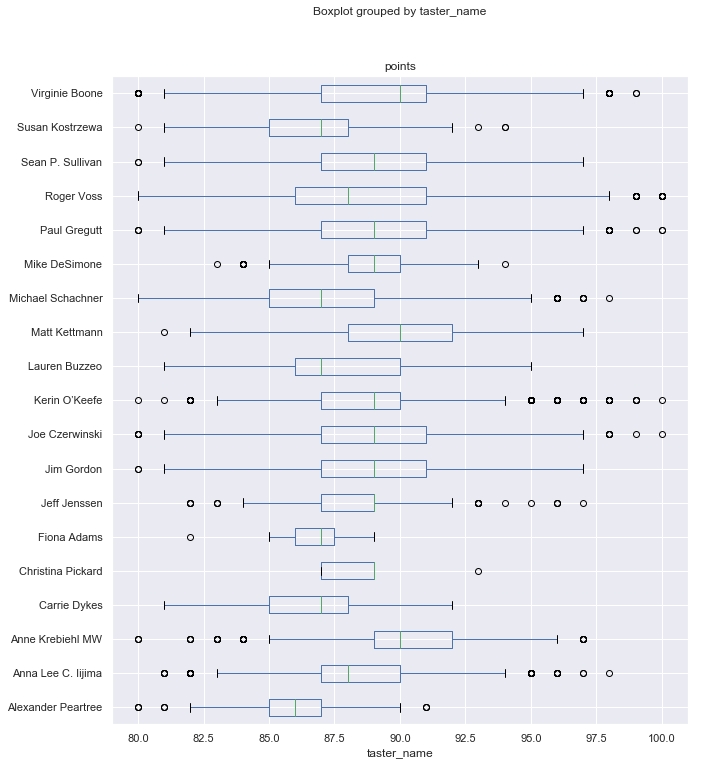

In [32]:
df.boxplot(by='taster_name', column='points',  vert=False, figsize=(10,12))

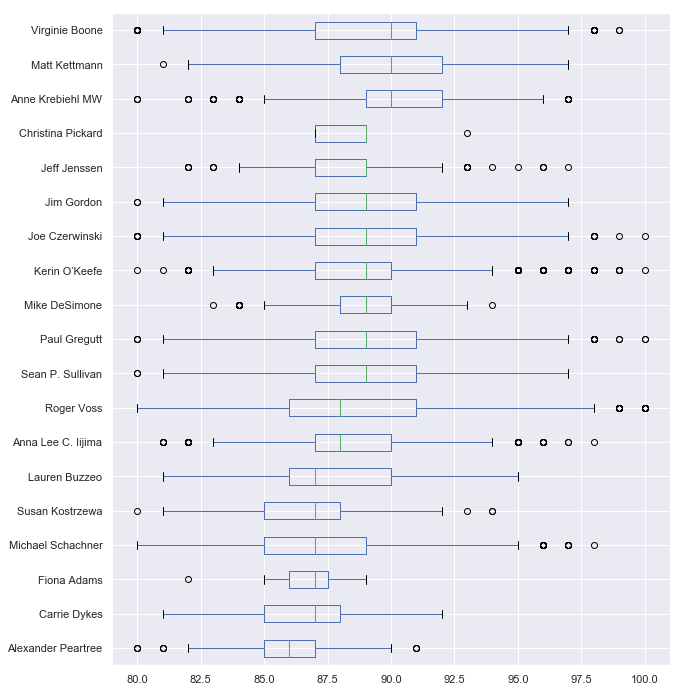

In [33]:
boxplot_sorted(df, by='taster_name', column='points',  vert=False, figsize=(10,12))

In [35]:
df.loc[df['points'] == 100].sort_values(by=['price'])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58548,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse
94349,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
52675,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
38560,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
102445,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
44510,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
91058,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
102474,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
99513,France,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
52554,US,This wine dazzles with perfection. Sourced fro...,La Muse,100,450.0,California,Sonoma County,Sonoma,NaN,NaN,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité


In [48]:
df[df.points > 96].sort_values(by=['price']).head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
44611,US,A seriously top of the heap California Syrah. ...,Fenaughty Vineyard,97,35.0,California,El Dorado,Sierra Foothills,Virginie Boone,@vboone,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah,Donkey & Goat
107439,Portugal,"This is a superb blend of aged tawny Ports, bl...",325 Anniversary,97,40.0,Port,NaN,NaN,Roger Voss,@vossroger,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate
58344,US,"Shows classic, full-throttle notes of tropical...",Estate Vineyard,99,44.0,California,Sonoma Coast,Sonoma,NaN,NaN,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla
108946,France,"Powered by intense botrytis, this wine is opul...",NaN,97,45.0,Bordeaux,Barsac,NaN,Roger Voss,@vossroger,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet
57236,France,The heady aromatic scent of fresh tangerine pe...,Clos Saint Landelin Vorbourg Grand Cru,97,50.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,Riesling,René Muré
62948,US,"A stunning Pirouette—63% Cabernet Sauvignon, 2...",Red Wine,98,50.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette
41967,US,The cold and fog actually helped this Chardonn...,Dutton Ranch Rued Vineyard,97,50.0,California,Green Valley,Sonoma,NaN,NaN,Dutton-Goldfield 2010 Dutton Ranch Rued Vineya...,Chardonnay,Dutton-Goldfield
88571,US,A monumental Cabernet that succeeds on every l...,Estate,97,50.0,California,Oak Knoll District,Napa,NaN,NaN,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen
111112,US,This wine shows real first-growth quality in i...,Allen Vineyard,97,50.0,California,Russian River Valley,Sonoma,NaN,NaN,Williams Selyem 2010 Allen Vineyard Chardonnay...,Chardonnay,Williams Selyem
108880,US,"This wine is insanely good, from a dry-farmed,...",Rocky Knoll,97,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Limerick Lane 2013 Rocky Knoll Zinfandel (Russ...,Zinfandel,Limerick Lane


In [41]:
df[df.winery.isin(top20)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
11,Chile,"Leafy, dry, earthy aromas come in front of a b...",Aliwen Reserva,87,13.0,Leyda Valley-Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Undurraga 2012 Aliwen Reserva Pinot Noir (Leyd...,Pinot Noir,Undurraga
62,Portugal,Coming from the cool climate of the Lisbon vin...,Point West,86,9.0,Lisboa,NaN,NaN,Roger Voss,@vossroger,DFJ Vinhos 2011 Point West Touriga Nacional (L...,Touriga Nacional,DFJ Vinhos
115,Chile,Undurraga's top Sauvignon hails from the premi...,T.H.,89,22.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,Undurraga 2008 T.H. Sauvignon Blanc (Leyda Val...,Sauvignon Blanc,Undurraga
137,US,Decisions on the viticulture and winemaking fo...,Crowdsourced,87,30.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Columbia Crest 2014 Crowdsourced Cabernet Sauv...,Cabernet Sauvignon,Columbia Crest
144,France,"A structured cru wine, full of firm tannins. I...",Flower Label,87,20.0,Beaujolais,Moulin-à-Vent,NaN,Roger Voss,@vossroger,Georges Duboeuf 2015 Flower Label (Moulin-à-V...,Gamay,Georges Duboeuf
152,US,"A harsh wine, with cutting acids and a thin fl...",Vintner's Reserve,82,17.0,California,California,California Other,NaN,NaN,Kendall-Jackson 2010 Vintner's Reserve Syrah (...,Syrah,Kendall-Jackson
154,Portugal,"A superior Vinho Verde, elegant and full-bodie...",Toucas,91,19.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Wines & Winemakers 2012 Toucas Alvarinho (Vinh...,Alvarinho,Wines & Winemakers
157,Chile,There's no denying this wine's greenness: It's...,Serie Riberas Gran Reserva Ribera del Rapel,89,17.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Concha y Toro 2011 Serie Riberas Gran Reserva ...,Sauvignon Blanc,Concha y Toro
175,France,"This wine has tight fruit, crisp cherry flavor...",Château de Nevers,86,20.0,Beaujolais,Brouilly,NaN,Roger Voss,@vossroger,Georges Duboeuf 2014 Château de Nevers (Broui...,Gamay,Georges Duboeuf
225,US,Made of equal parts ultraripe pineapple and ex...,Rosella's Vineyard,92,44.0,California,Santa Lucia Highlands,Central Coast,NaN,NaN,Testarossa 2008 Rosella's Vineyard Chardonnay ...,Chardonnay,Testarossa


In [55]:
df.title.str.extract('((19|20)\d{2})')

,0,1
0,2014,20
1,2010,20
2,2013,20
3,2011,20
4,2004,20
5,2015,20
6,2010,20
7,2009,20
8,2007,20
9,NaN,NaN


In [56]:
df['year'] = df.title.str.extract('((19|20)\d{2})')
df.year.value_counts()

ValueError: Wrong number of items passed 2, placement implies 1

In [58]:
def get_favs(name, min_count=10):
    favs = df[df.taster_name == name].groupby('variety')['points'].describe(percentiles=[.95]).sort_values('95%', ascending=False)
    return favs[favs['count'] >= min_count]

get_favs("Paul Gregutt").head(30)

,count,mean,std,min,50%,95%,max
variety,,,,,,,
Cabernet Sauvignon-Syrah,18.0,92.388889,3.500233,87.0,94.0,96.00,96.0
Cabernet Sauvignon-Merlot,11.0,89.636364,3.905707,84.0,90.0,95.50,96.0
Cabernet Sauvignon,615.0,89.346341,3.249462,81.0,89.0,95.00,99.0
Bordeaux-style Red Blend,285.0,90.329825,2.701719,83.0,91.0,95.00,98.0
Riesling,440.0,89.431818,2.821151,82.0,90.0,94.00,96.0
Syrah,622.0,89.495177,3.167235,82.0,90.0,94.00,100.0
Chardonnay,714.0,89.309524,2.923665,80.0,89.0,94.00,96.0
Grenache,64.0,89.000000,3.142136,81.0,89.0,94.00,95.0
Rhône-style Red Blend,73.0,89.726027,2.897606,85.0,90.0,94.00,96.0


In [59]:
df['is_good'] = df.points > 88

In [60]:
df.is_good.value_counts()

False    61869
True     55104
Name: is_good, dtype: int64

In [62]:
train = df.drop(['is_good', 'points', 'price'], axis=1)

In [63]:
train.head(10)

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord
5,US,Ripe yellow peach and sunny citrus flavors are...,Unoaked North Ridge Vineyard,New York,North Fork of Long Island,Long Island,Anna Lee C. Iijima,NaN,McCall 2015 Unoaked North Ridge Vineyard Chard...,Chardonnay,McCall
6,France,"From the Vincent family of Château de Fuissé, ...",Marie-Antoinette,Burgundy,Pouilly-Fuissé,NaN,Roger Voss,@vossroger,Vincent 2010 Marie-Antoinette (Pouilly-Fuissé),Chardonnay,Vincent
7,US,From the estate vineyard of a winery founded i...,Domaine Lois Louise Cote Sud,California,Santa Cruz Mountains,Central Coast,Matt Kettmann,@mattkettmann,Clos de la Tech 2009 Domaine Lois Louise Cote ...,Pinot Noir,Clos de la Tech
8,Italy,MandraRossa's well-priced Fiano offers Golden...,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,MandraRossa 2007 Fiano (Sicilia),Fiano,MandraRossa
9,Australia,"Like Chambers' entry-level Muscadelle, this Mu...",NaN,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Muscat (Rutherg...,Muscat,Chambers Rosewood Vineyards


In [64]:
train_df, test_df, train_labels, test_labels = train_test_split(train, df.is_good, random_state = 3)

In [65]:
train_df.shape

(87729, 11)

In [66]:
test_df.shape

(29244, 11)

In [67]:
train_labels.shape

(87729,)

In [68]:
%%time

model = make_pipeline(
        CountVectorizer(),
        MultinomialNB())

model.fit(train_df.description, train_labels);

Wall time: 4.56 s


In [69]:
predicted = model.predict(test_df.description)
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.796
              precision    recall  f1-score   support

       False       0.81      0.80      0.81     15450
        True       0.78      0.80      0.79     13794

   micro avg       0.80      0.80      0.80     29244
   macro avg       0.80      0.80      0.80     29244
weighted avg       0.80      0.80      0.80     29244



In [70]:
show_most_informative_features(model)

-2.7388            and    -14.4417        žilavka
-3.1346            the    -14.4417      çalkarasi
-3.3951             of    -14.4417           zuri
-3.8513           this    -14.4417          zooms
-3.8610           with    -14.4417         zoomed
-4.0091             is    -14.4417          zones
-4.1221             it    -14.4417       zlahtina
-4.1836           wine    -14.4417       zingiest
-4.3999             in    -14.4417     zingarelli
-4.5609             to    -14.4417       zinfully
-4.6088        flavors    -14.4417            zig
-4.6872          fruit    -14.4417         zibibo
-4.8070             on    -14.4417       zestness
-4.8766           that    -14.4417        zesting
-4.8940           from    -14.4417        zestful
-4.9558         palate    -14.4417    zerosolfiti
-5.0175          black    -14.4417           zere
-5.0604        tannins    -14.4417          zerba
-5.0704         aromas    -14.4417           zena
-5.0936          drink    -14.4417         zefina


In [72]:
%%time

model2 = make_pipeline(
        TfidVectorizer(ngram_range=(1,2)),
        MultinomialNB())

model2.fit(train_df.description, train_labels);

NameError: name 'TfidVectorizer' is not defined

In [77]:
%%time
 
categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))
 
model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                (['year'], make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()))),
            SGDClassifier(n_jobs=-1, max_iter=1000))
 
model.fit(train_df, train_df.is_good)
 
predicted = model.predict(test_df)
 
score = metrics.accuracy_score(test_df.is_good, predicted)
print('\nAccuracy: %0.3f' % score)
 
print(metrics.classification_report(test_df.is_good, predicted))

AttributeError: 'DataFrame' object has no attribute 'is_good'

In [83]:
%%time
 
categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))
 
model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                (['year'], make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()))),
            SGDClassifier(n_jobs=-1, max_iter=1000))

train_df['year'] = train_df.title.str.extract('((?:19|20)\d{2})')
model.fit(train_df, train_labels)

test_df['year'] = test_df.title.str.extract('((?:19|20)\d{2})')    
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))

C:\ProgramData\Miniconda3\envs\sommelier\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Miniconda3\envs\sommelier\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Accuracy: 0.833
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     15450
        True       0.83      0.81      0.82     13794

   micro avg       0.83      0.83      0.83     29244
   macro avg       0.83      0.83      0.83     29244
weighted avg       0.83      0.83      0.83     29244

Wall time: 47.1 s


In [90]:
%%time
df['year'] = df.title.str.extract('((?:19|20)\d{2})')
train = df.drop(['is_good', 'points', 'price'], axis=1)
train_df, test_df, train_labels, test_labels = train_test_split(train, df.is_good, random_state = 3)
df['year'].value_counts().head(10)

Wall time: 690 ms


In [92]:
show_most_informative_features(model)

AttributeError: Transformer pipeline-1 (type Pipeline) does not provide get_feature_names.

In [96]:
%%time
 
categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))
 
model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer({2,3})),
                (categorical_features, categorical_transformer),
                (['year'], make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()))),
            SGDClassifier(n_jobs=-1, max_iter=1000))


model.fit(train_df, train_labels)


predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.833
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     15450
        True       0.83      0.82      0.82     13794

   micro avg       0.83      0.83      0.83     29244
   macro avg       0.83      0.83      0.83     29244
weighted avg       0.83      0.83      0.83     29244

Wall time: 46.5 s
